In [1]:
# load all files from 'wobinn_boomy_files.txt'
with open('wobinn_boomy_files.txt', 'r') as f:
    files = f.read().splitlines()

# Metadata

In [2]:
from mutagen.easyid3 import EasyID3

# Get genres and release date 
genres = []
dates = []
for file in files:
    audio = EasyID3(file)
    html_file = file.replace('.mp3', '.html')

    html_content = open(html_file, 'r').read()
    
    release_date = html_content.split('"release_date":')[1].split(',')[0]
    dates.append(release_date[1:-1])

    for g in audio['genre']:
        genres.append(g)

## Genre

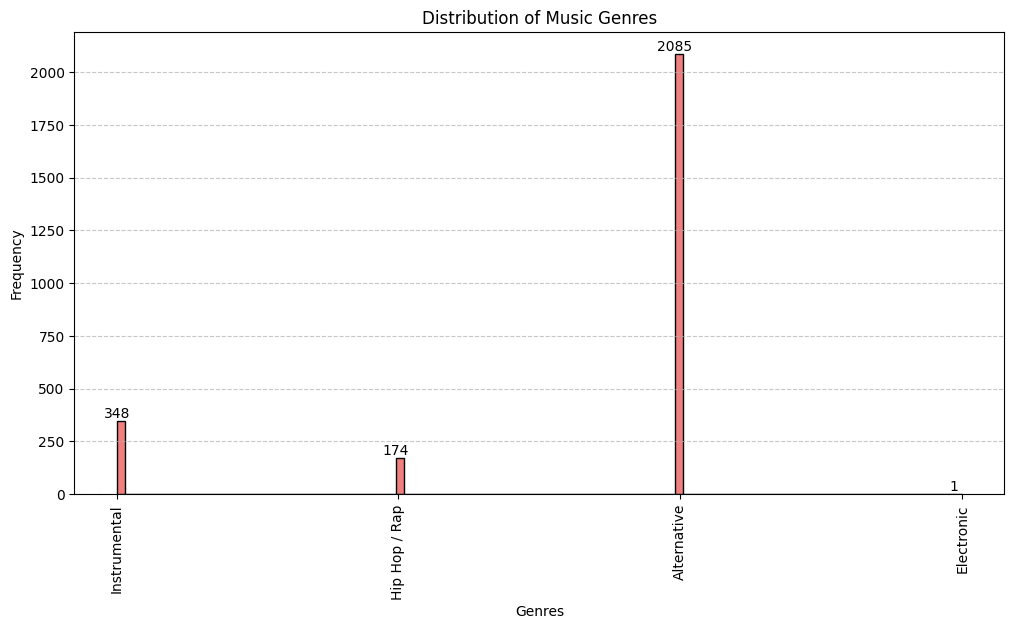

In [3]:
import matplotlib.pyplot as plt

# Assuming 'genres' is a list of genre labels

# Plot histogram
plt.figure(figsize=(12, 6))
counts, bins, _ = plt.hist(genres, bins=100, color='lightcoral', edgecolor='black')  # Adjust color and edgecolor as per your preference

# Add labels and title
plt.title('Distribution of Music Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts above the bars for counts greater than 0
for count, bin, patch in zip(counts, bins, _):
    if count > 0:
        plt.text(bin, count + 0.1, str(int(count)), ha='center', va='bottom')

# Show the plot
plt.show()

## Release date

In [4]:
import datetime

# dates in format yyyy-mm-ddT00:00:00Z
dates = [datetime.datetime.strptime(d, '%Y-%m-%dT%H:%M:%SZ') for d in dates]
# sort
dates.sort()

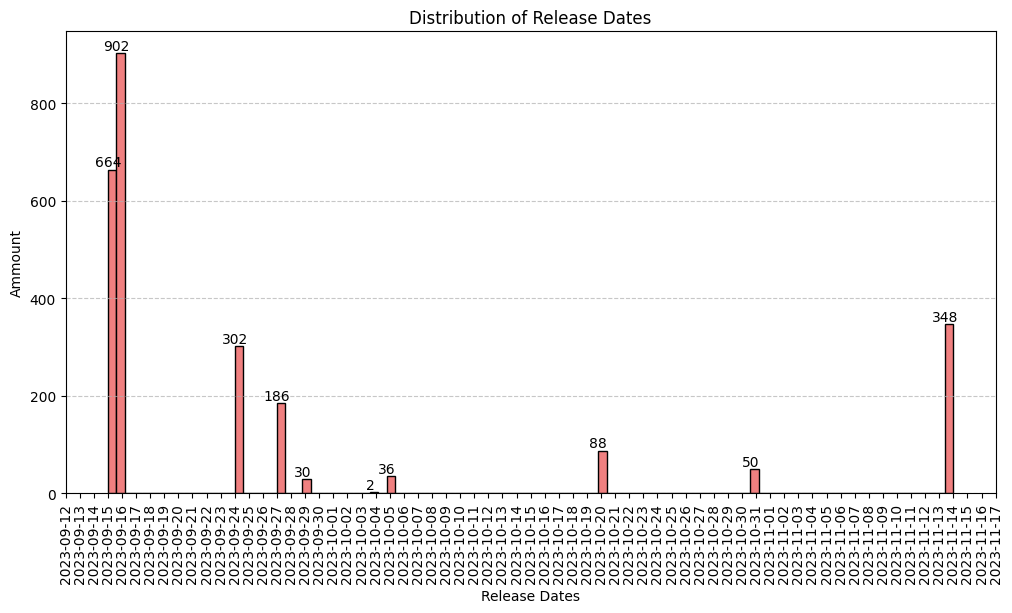

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Plot histogram
plt.figure(figsize=(12, 6))
counts, bins, _ = plt.hist(mdates.date2num(dates), bins=100, color='lightcoral', edgecolor='black')  

# Add labels and title
plt.title('Distribution of Release Dates')
plt.xlabel('Release Dates')
plt.ylabel('Ammount')

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
# have x-axis labels show every date that has a bar
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))


# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts above the bars for counts greater than 0
for count, bin, patch in zip(counts, bins, _):
    if count > 0:
        plt.text(bin, count + 0.1, str(int(count)), ha='center', va='bottom')

# Show the plot
plt.show()

# Low level statistics

## Durations

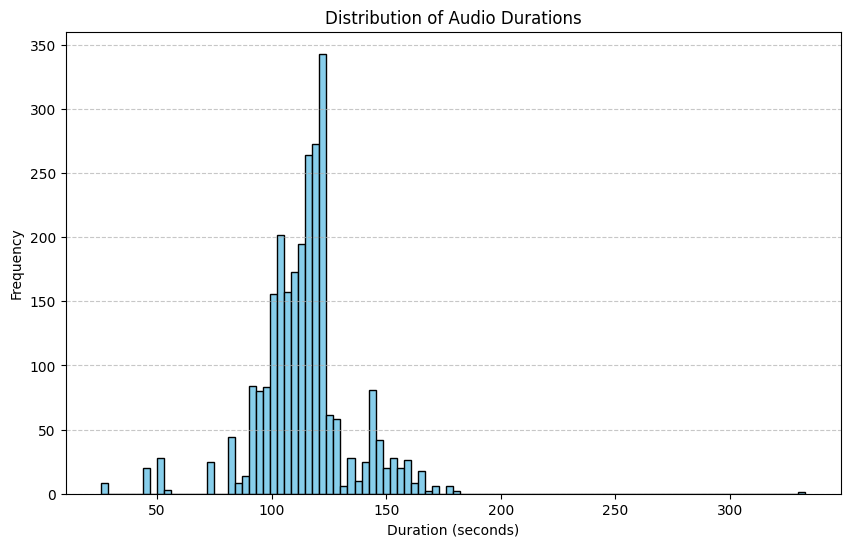

In [6]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

# Assuming 'files' is a list of file paths

# Collect durations
durations = [sf.info(file).duration for file in files]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=100, color='skyblue', edgecolor='black')  # Adjust color and edgecolor as per your preference

# Add labels and title
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()